In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Set working directory

In [12]:
import os
os.chdir ("E:/UEL SCHOOL MATERIALS/Predictive Analysis and Machine Learning/Assignments")

In [14]:
#Load the online shoppers intention dataset
df = pd.read_csv("E:/UEL SCHOOL MATERIALS/Predictive Analysis and Machine Learning/Assignments/online_shoppers_intention.csv")

In [16]:
#Check for number of rows and columns
df.shape

(12330, 18)

In [20]:
#Display first 10 rows of the dataset
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [18]:
#get the statistics of the dataset
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [20]:
# get the count of missing values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Let us vizualize the percentage of customers who brought revenue. If a customer made a purchase then it is noted by "True" and "False" if they didn't make a purchase.

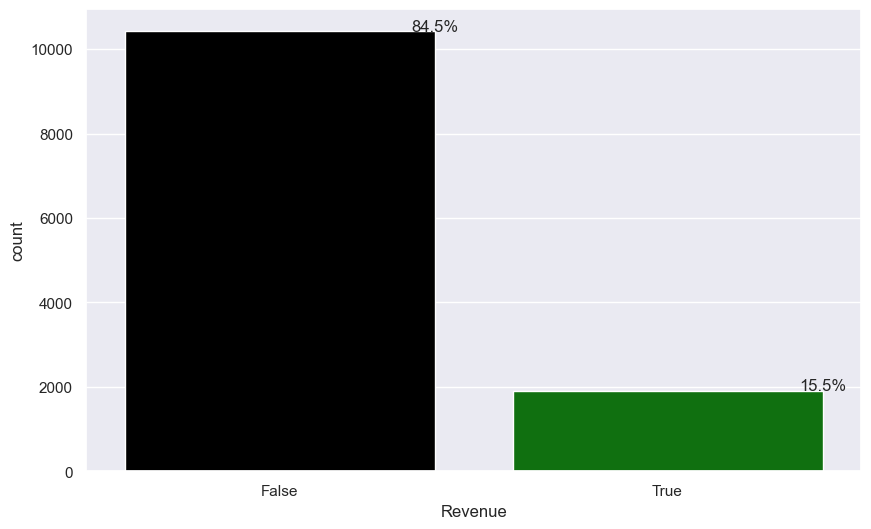

In [23]:
import seaborn as sns

sns.set(style = "darkgrid")
plt.figure(figsize = (10,6))
total = float(len(df)) #calculates the number of entries in df
ax = sns.countplot (x = "Revenue", data=df, palette={"True": "green", "False": "black"})
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total) #calculate the percentage to 1 decimal place
    x = p.get_x() + p.get_width() #getting the x coordinate
    y = p.get_height() #getting height of the bar
    ax.annotate (percentage, (x, y), ha='center')
plt.show()
    

Visualization of Vistor Type

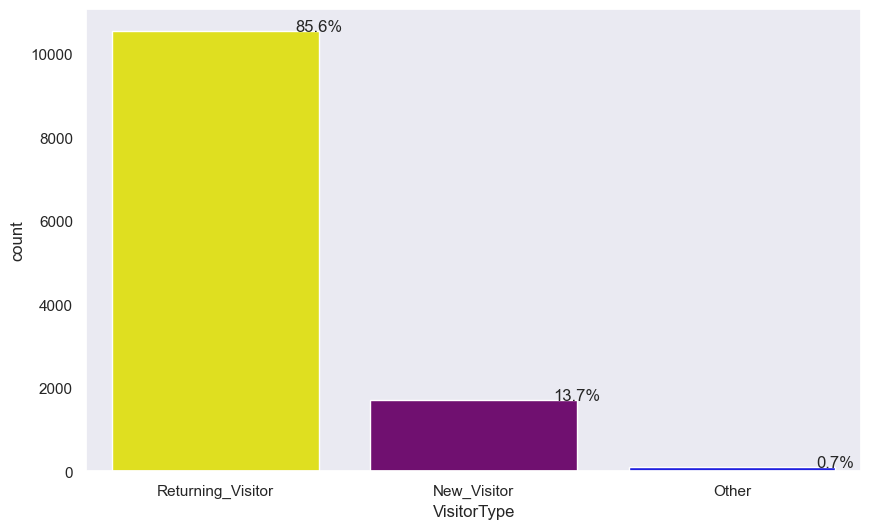

In [26]:
df['VisitorType'].value_counts() # counts the number of appearances of each visitor type
sns.set(style="dark")
plt.figure(figsize=(10,6))
total = float(len(df)) # calculate the number of rows
ax=sns.countplot(x="VisitorType", data=df, palette= {"Returning_Visitor": "yellow", "New_Visitor":"purple", "Other": "blue"
                                                    })
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total) #calculate percentage to 1 decimal point
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x,y), ha='center')

plt.show()

Let us see the proportion of visitor types over the weekend visits

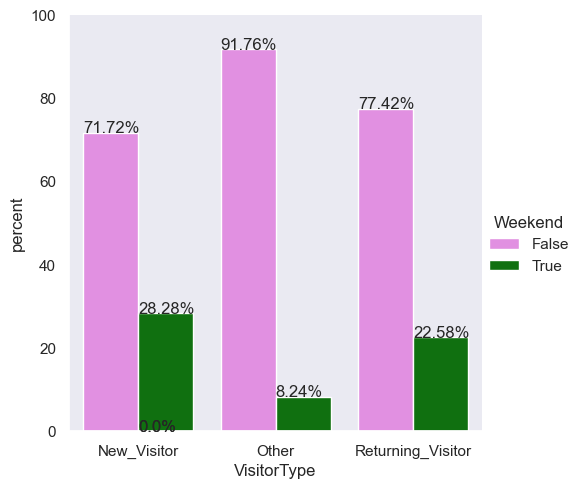

In [29]:
x,y = 'VisitorType', 'Weekend'
df1 = df.groupby(x)[y].value_counts(normalize = True) #group df1 by VisitorType and calculate percentage of each type for the weekend
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent', hue=y,kind='bar', data=df1, palette={True:"green", False: "violet"}) #categorical plot showing percentage of visitor type over the weekend
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(round(float(p.get_height()), 2)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)



Relationship between Revenue(buy or not buy) and different Traffic Types

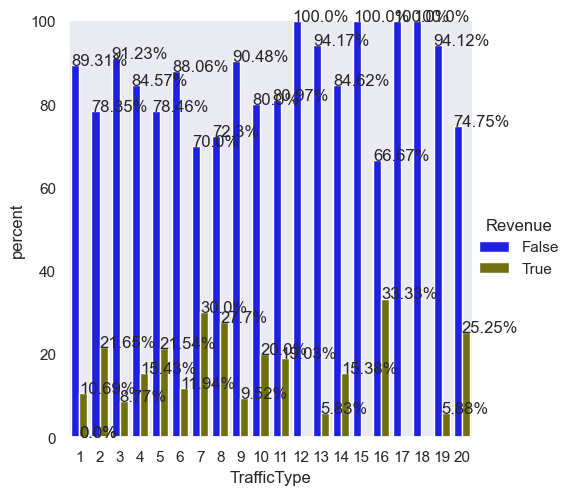

In [32]:
x,y = 'TrafficType', 'Revenue'
df1 = df.groupby(x)[y].value_counts(normalize = True) #group df1 by TrafficType and calculate percentage of each revenue for each Traffic Type
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
g = sns.catplot(x=x,y='percent', hue=y,kind='bar', data=df1, palette={True:"olive", False: "blue"}) #categorical plot showing percentage oby Traffic Type
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(round(float(p.get_height()), 2)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)


Customer Distribution Across various Traffic Type Codes

Text(0, 0.5, 'Count')

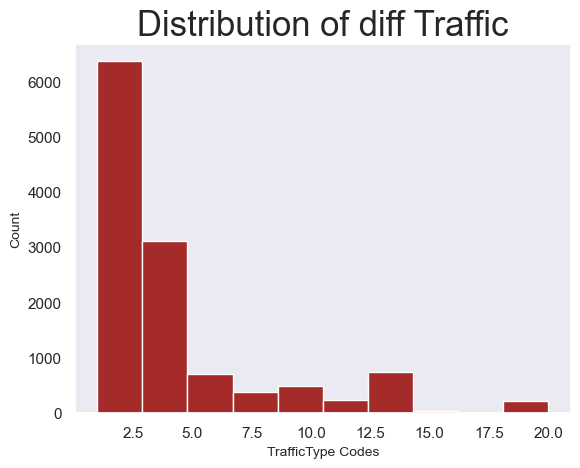

In [35]:
plt.hist(df['TrafficType'], color = 'brown')
plt.title('Distribution of diff Traffic',fontsize = 25)
plt.xlabel('TrafficType Codes', fontsize = 10)
plt.ylabel('Count', fontsize = 10)

Let us see how customers are distributed based on Region Codes

Text(0, 0.5, 'Count')

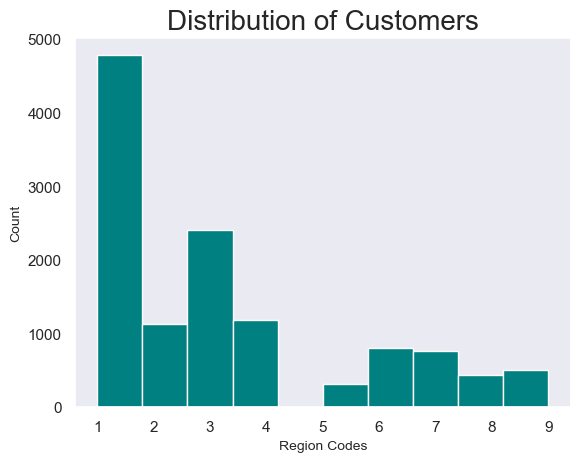

In [38]:
plt.hist(df['Region'], color = "teal")
plt.title('Distribution of Customers',fontsize = 20)
plt.xlabel('Region Codes', fontsize = 10)
plt.ylabel('Count', fontsize = 10)

Distribution of Customers over OperatingSystems

Text(0, 0.5, 'Count')

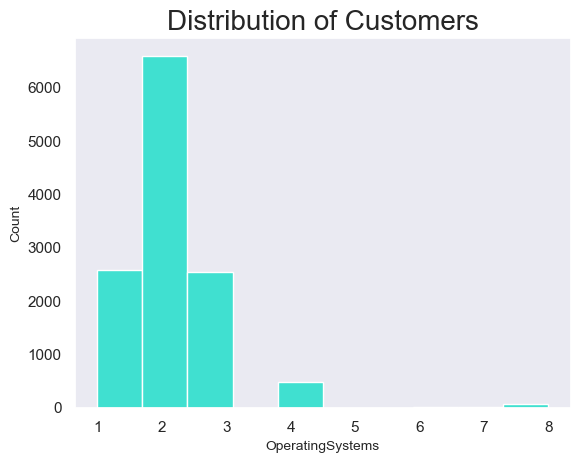

In [41]:
plt.hist(df['OperatingSystems'], color = "turquoise")
plt.title('Distribution of Customers',fontsize = 20)
plt.xlabel('OperatingSystems', fontsize = 10)
plt.ylabel('Count', fontsize = 10)

Customer Distribution by Months

Text(0, 0.5, 'Count')

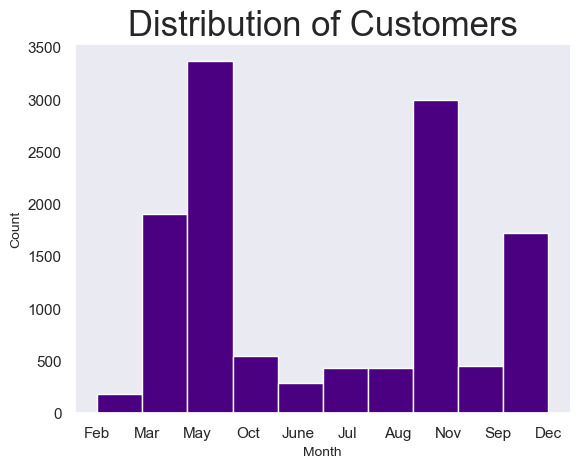

In [44]:
plt.hist(df['Month'], color = "indigo")
plt.title('Distribution of Customers',fontsize = 25)
plt.xlabel('Month', fontsize = 10)
plt.ylabel('Count', fontsize = 10)

Analysis of Page Values Across Revenue

<Axes: xlabel='Revenue', ylabel='PageValues'>

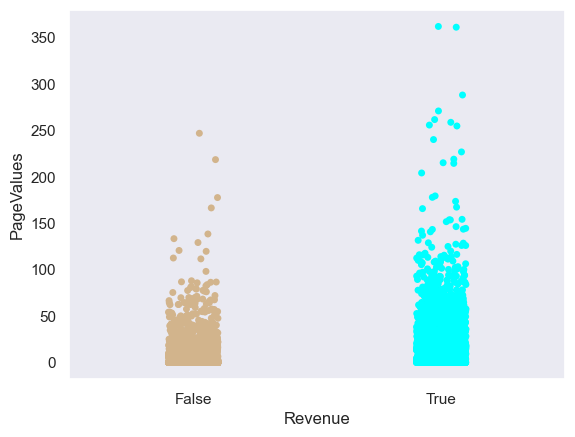

In [47]:
sns.stripplot(x='Revenue', y='PageValues', data=df, palette = {"True": "cyan" , "False": "tan"}) #create a strip plot

Analysis of TrafficType Across Revenue

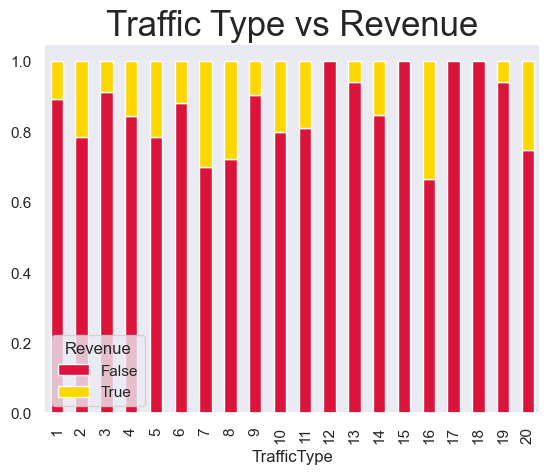

In [50]:
df2 = pd.crosstab(df['TrafficType'], df['Revenue']) #Create a cross-tabulation of 'TrafficType' vs. 'Revenue'
df2.div(df2.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = ['crimson', 'gold'])
plt.title('Traffic Type vs Revenue', fontsize = 25)
plt.show()

Distribution of Region over Revenue

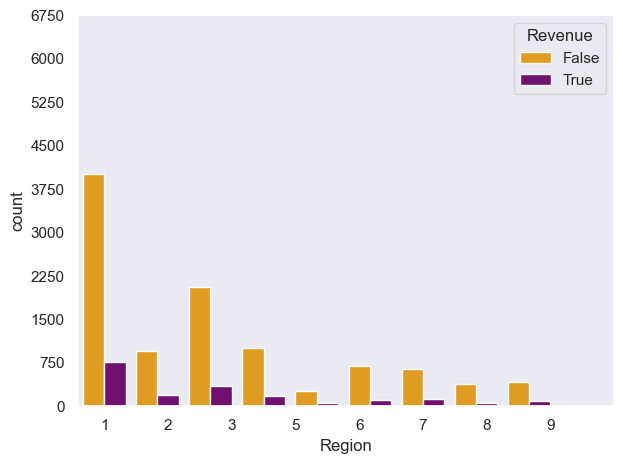

In [53]:
def with_hue(ax, data, x_factor, y_factor):
    x_ticks = np.array(ax.get_xticks())  
    y_ticks = np.array(ax.get_yticks())  
    ax.set_xticks(x_ticks * x_factor)  
    ax.set_yticks(y_ticks * y_factor)  
    ax.legend(title='Revenue')  
    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()   


ax4 = sns.countplot(x='Region', hue='Revenue', data=df, palette={True: 'purple', False: 'orange'})  # Count plot 
with_hue(ax4, df['Region'], 1.2, 1.5)


 Linear Regression plot between Administrative and Informational

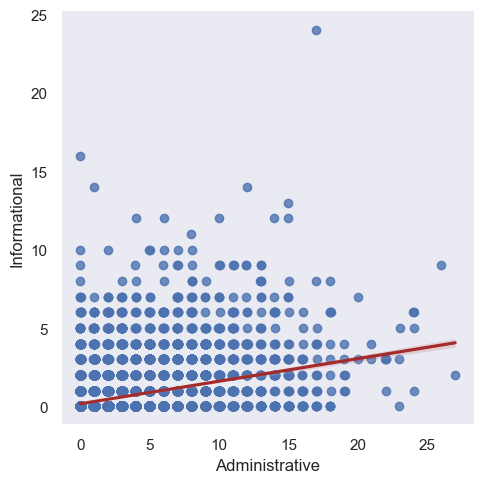

In [56]:
sns.lmplot(x = 'Administrative', y = 'Informational', data = df, x_jitter = 0.05, line_kws={'color' : 'brown'}) #linear model plot showing the relationship between 'Administrative' and 'Informational' variables 

Multivaraite Analysis

We will be plotting Month vs Pagevalues wrt Revenue

Text(0.5, 1.0, 'Mon. vs Pagevalues w.r.t Rev.')

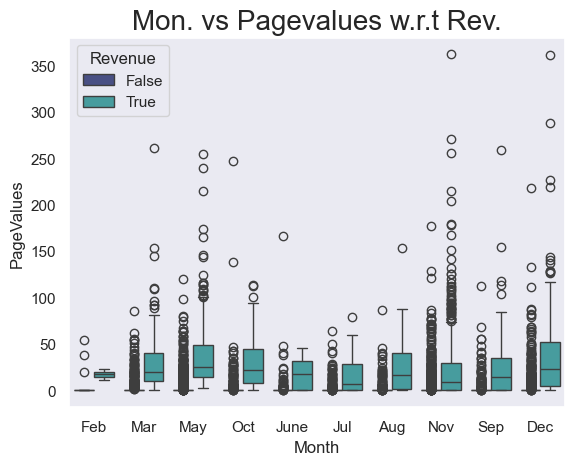

In [59]:
sns.boxplot(x=df['Month'], y=df['PageValues'], hue=df['Revenue'],palette='mako')
plt.title('Mon. vs Pagevalues w.r.t Rev.', fontsize = 20)

month vs bouncerates wrt revenue

Text(0.5, 1.0, 'Mon. vs BounceRates w.r.t. Rev.')

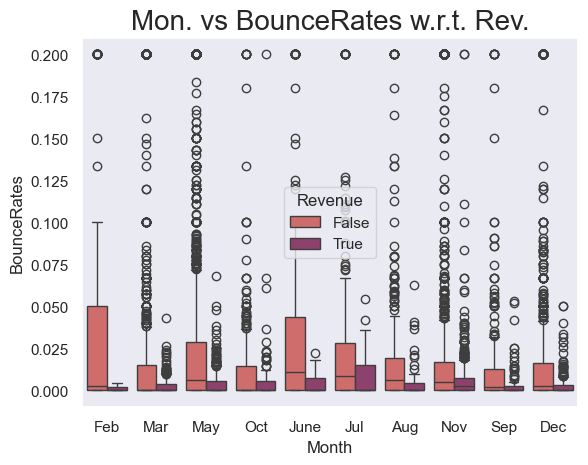

In [62]:
sns.boxplot(x = df['Month'], y = df['BounceRates'], hue = df['Revenue'], palette = 'flare')
plt.title('Mon. vs BounceRates w.r.t. Rev.', fontsize = 20)

visitor type vs bounce rates w.r.t revenue

Text(0.5, 1.0, 'Visitors vs BounceRates w.r.t. Rev.')

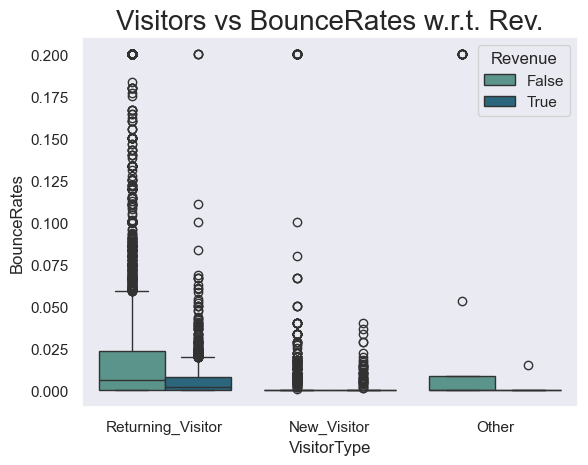

In [65]:
sns.boxplot(x = df['VisitorType'], y = df['BounceRates'], hue = df['Revenue'], palette = 'crest')
plt.title('Visitors vs BounceRates w.r.t. Rev.', fontsize = 20)


month vs exit rates wrt revenue

Text(0.5, 1.0, 'Mon. vs ExitRates w.r.t. Rev.')

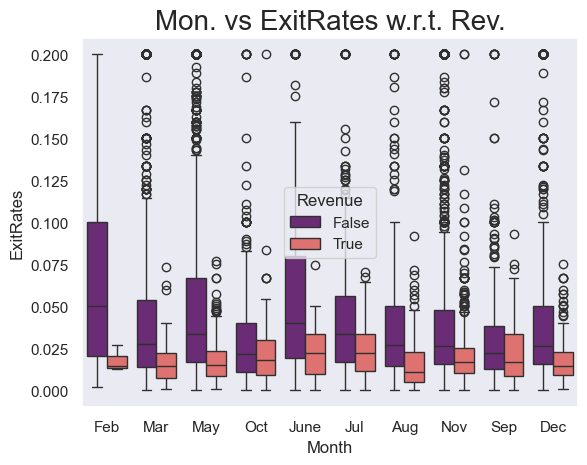

In [68]:
sns.boxplot(x = df['Month'], y = df['ExitRates'], hue = df['Revenue'], palette = 'magma')
plt.title('Mon. vs ExitRates w.r.t. Rev.', fontsize = 20)

Data Pre-Processing for Model Building

Customer Segmentation

The goal is to identify effective marketing strategies and we could do this by clustering.

The goal of cluster analysis in marketing is to segment the customers for the personalised marketing. This is popularly done through k-means cluster analysis which is also called scientific segmentation.

We focused on two variables from the overview (administrative duration (column 1) and bounce rate (column 6) to create 11 customer clusters.

A crucial measurement for this analysis is the Within Cluster Sum of Squares (WCSS), which measures the distance of points in a cluster from the cluster centre (centroid). To calculate WCSS we find euclidean distance between each point and centroid assigned to it.

We use the Elbow method to check WCSS vs Number of Clusters for K-means.

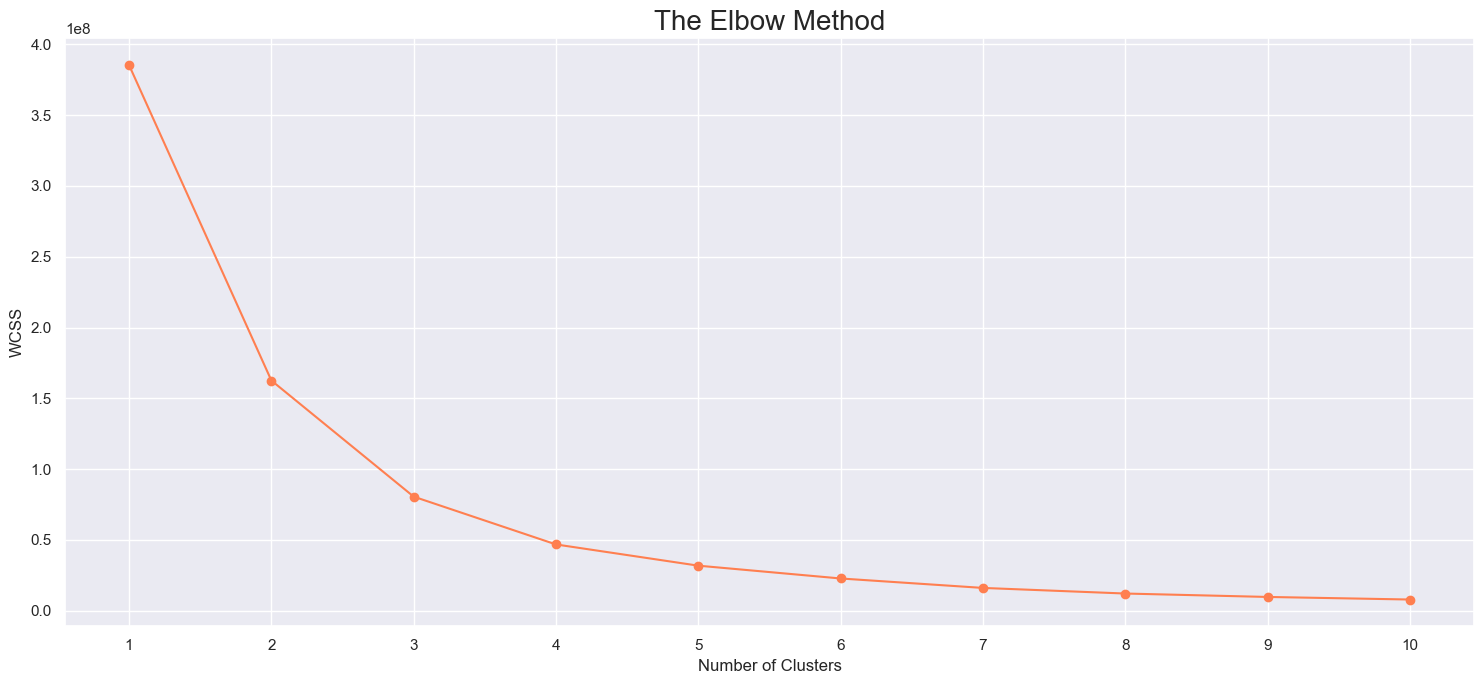

In [72]:
from sklearn.cluster import KMeans

x = df.iloc[:, [1, 6]].values  # Select columns 1 (Administrative Duration) and 6 (Bounce Rates)

# Calculate WCSS for a range of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(15, 7))
plt.plot(range(1, 11), wcss, color='coral', marker='o')
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))  
plt.grid()
plt.tight_layout()
plt.show()

# Now apply K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, 
                 init='k-means++', 
                 max_iter=300, 
                 n_init=10, 
                 random_state=0)

kmeans.fit(x)


labels = kmeans.labels_


To analyze our data more effectively, we've decided to create two groups. This approach helps us categorize customers based on their behavior, enabling us to identify various user types and customize our marketing strategies accordingly.

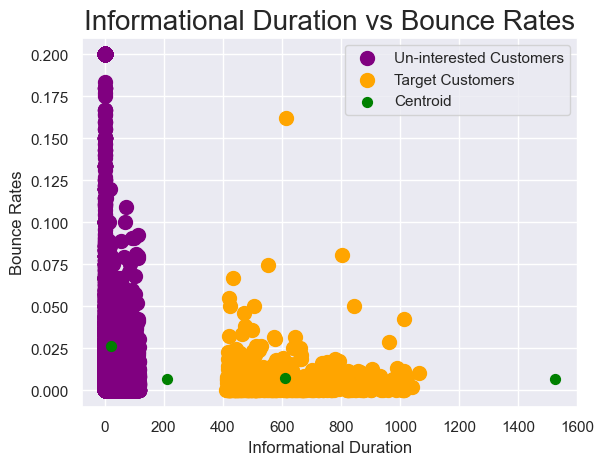

In [75]:
km = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c='purple', label='Un-interested Customers')  
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c='orange', label='Target Customers')  
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=50, c='green', label='Centroid')  

plt.title('Informational Duration vs Bounce Rates', fontsize=20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()


Let us look at where the customer comes from that is Region vs Traffic Type

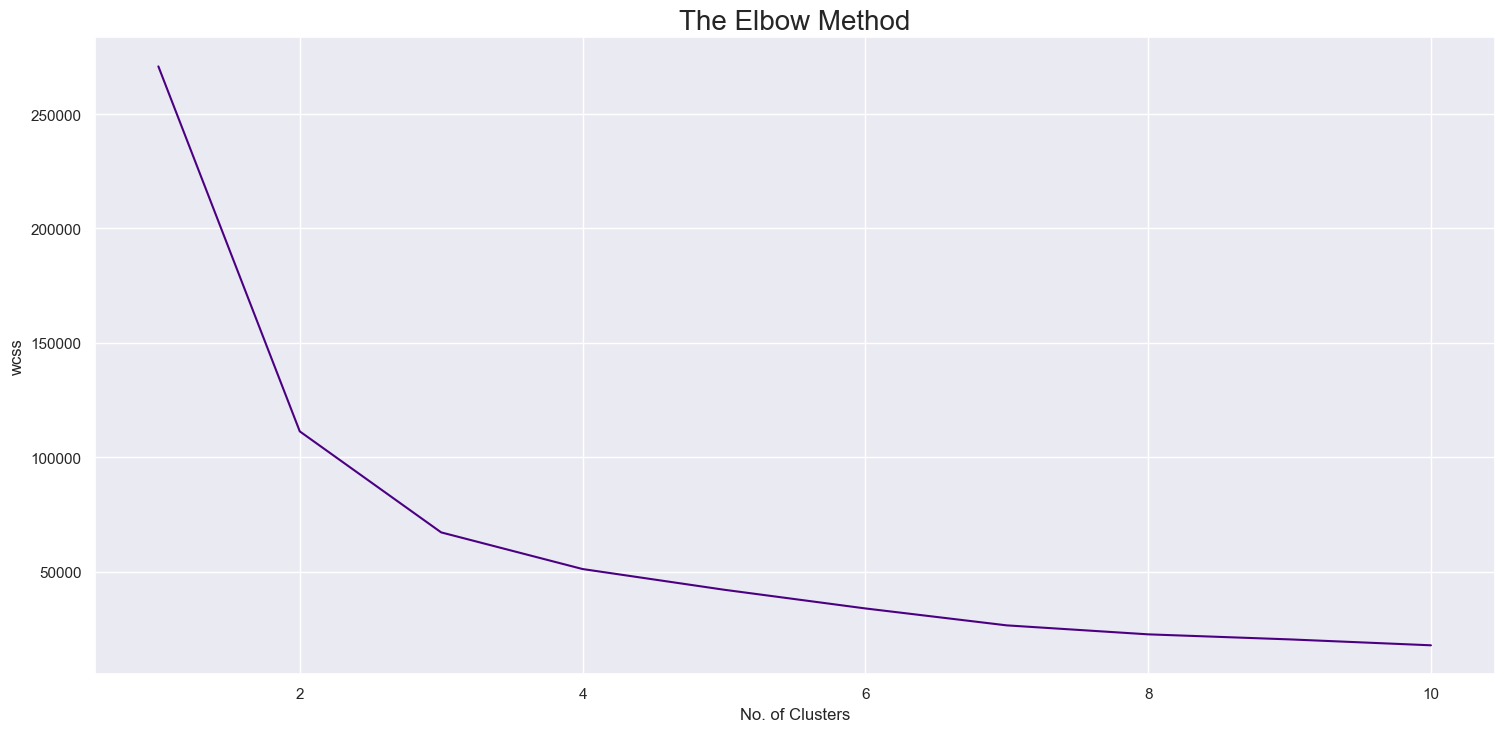

In [78]:
x = df.iloc[:, [13,14]].values
wcss = []

for i in range (1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0,
                algorithm = 'elkan',
                tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

plt.rcParams['figure.figsize'] = (15,7)
plt.plot(range(1, 11), wcss, color = 'indigo')

plt.grid()
plt.tight_layout()

plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')

plt.show()


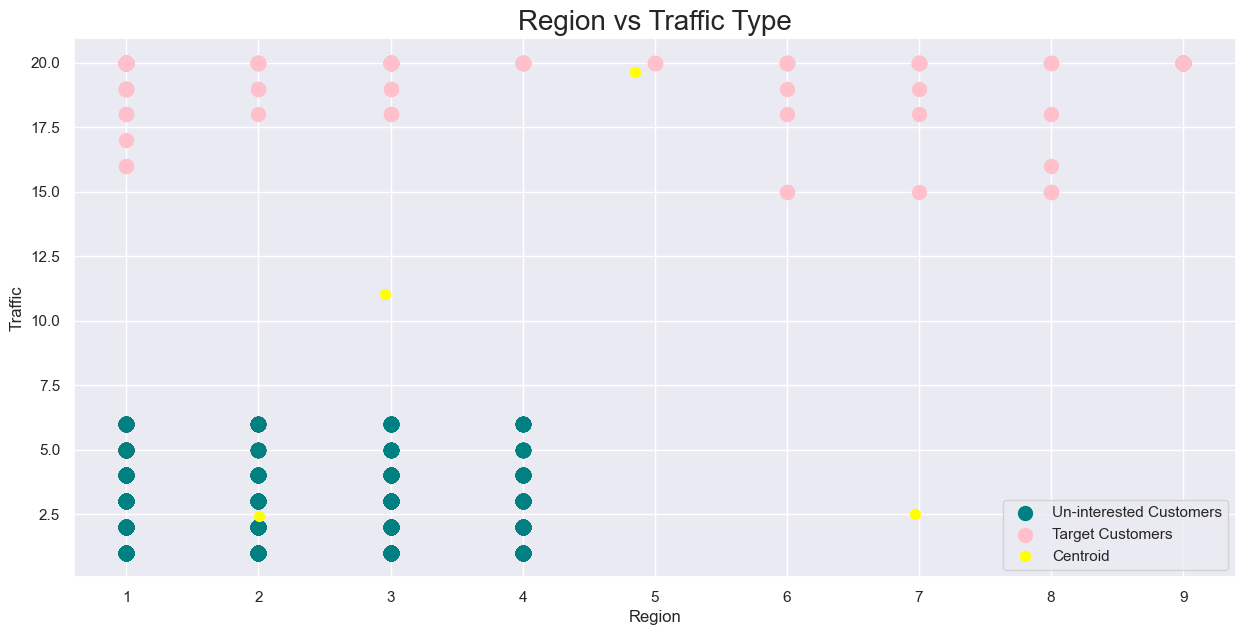

In [80]:
km = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c='teal', label='Un-interested Customers')  
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c='pink', label='Target Customers')  
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=50, c='yellow', label='Centroid')  

plt.title('Region vs Traffic Type', fontsize=20)
plt.grid()
plt.xlabel('Region')
plt.ylabel('Traffic')
plt.legend()


# **Data Preprocessing for Predictive Modelling**

Building a Random Forest Classifier and Logistic Regression

In this stage, we prepare the dataset in order to train machine learning models that will predict the way in which customers will behave when making purchases. Thus, with the help of a binary classifier, we aim to categorize the customers into two groups, the ones who will purchase and the ones who will not. It is important to note that this step in the preprocessing of data is very crucial in improving the performance of the model and making sure the predictions are correct, which in turn helps in the effective implementation of marketing strategies.

In [84]:
# let's convert categorical variables into dummy variables

data1 = pd.get_dummies(df) #create the dummy variables for all categorical columns
data1.columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Revenue'] = le.fit_transform(df['Revenue']) #transform the Revenue column to numerical values
df['Revenue'].value_counts()

# getting dependent and independent variables
x=data1
# removing the target column revenue from 
x = x.drop(['Revenue'], axis = 1)
y = data1['Revenue'] #set dependent variable as the 'Revenue' column
# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (12330, 28)
Shape of y: (12330,)


Now we can split the data into train and test sets 

In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0) # the testing sets is 30% of the data
# checking the shape
print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8631, 28)
Shape of y_train : (8631,)
Shape of x_test : (3699, 28)
Shape of y_test : (3699,)


# **Modeling**

This section of the project is aimed at the  application of predictive models to understand, which customers are most likely to make a purchase depending on the availability of features in the given dataset. By using the Random Forest Classifier, which is recognized for its robustness and reliability in dealing with intricate data, and also a Logistic Regression model for binary classification, we will obtain those models. These models will give us insight into the customer's behavior and thus, help us create marketing tactics that are  to their needs.


RandomForest Classifier Model

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.8932143822654771


An accuracy of 100% was achieved by the model for the training data. This shows that the model has accurately classified all the training examples. It might seem impressive; however, it may also overfit the data, which means the model has learned the training data too well, including its noise and outliers. It can result in less accurate generalization to unseen data.


Training data accuracy is about 89.3%. It is a strong performance and indicates that the model can generalize to some or all of the new unseen data. Nonetheless, as the training accuracy is more than the test accuracy, it can be inferred that the overfitting problem arises. The ideal situation is where the difference between the two types of accuracies is as small as possible.

# **Confusion Matrix**

To this end, we are going to use the confusion matrix for a better understanding of the performance of the Random Forest classifier. Even though the model archived a training accuracy of 100%, the testing accuracy, on the other hand, was found to be around 89%. It is possible that the model simply overfitted to the training data which means it found patterns that did not generalize well to new and unseen data. The confusion matrix will provide a full breakdown of the model's predictions, hence we will be able to investigate true positives, true negatives, false positives, and false negatives. By following these metrics, we can hence grasp the way the model discriminates the classes and can point out the spots where there can be potential improvements.

              precision    recall  f1-score   support

       False       0.91      0.96      0.94      3077
        True       0.74      0.56      0.64       622

    accuracy                           0.89      3699
   macro avg       0.83      0.76      0.79      3699
weighted avg       0.89      0.89      0.89      3699



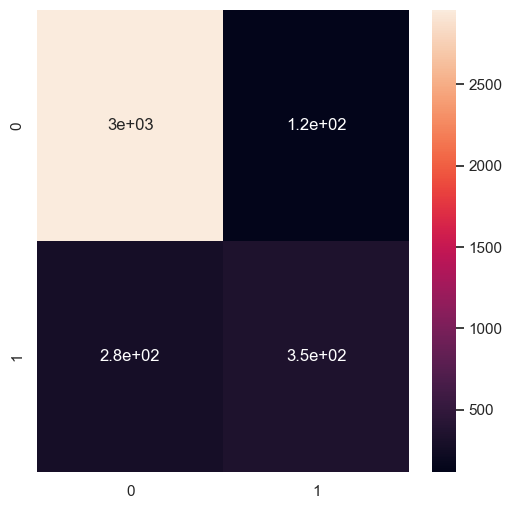

In [95]:
cm = confusion_matrix(y_test, y_pred) #calculates the confusion matrix comparing actual and predicted values
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)
# classification report
cr = classification_report(y_test, y_pred)
print(cr)

The confusion matrix and classification report depict our model as a strong predictor for this target, with such a high accuracy as 89%. Nevertheless, the model is less accurate in predicting customers who will buy. Concretely, correct 96% of the time the model will say "no" to the customers who are non-buyers, but, alarmingly, it correctly says "yes" only in 55% of the cases where it is real. It implies that the model does a better job of identifying customers who are not likely to buy, but we could improve its ability to recognize potential buyers that would allow us to have a more balanced marketing strategy.

As we went through the first confusion matrix, we could see how the model behaved on the test data. To drill down deeper into the performance of the model from the whole, we will create a second confusion matrix. This will be the one that will give us a summary of how the model correctly classified all the data points in the dataset i.e. the training and testing parts, which in turn will help us further evaluate its predictive ability and the average pattern, if any.

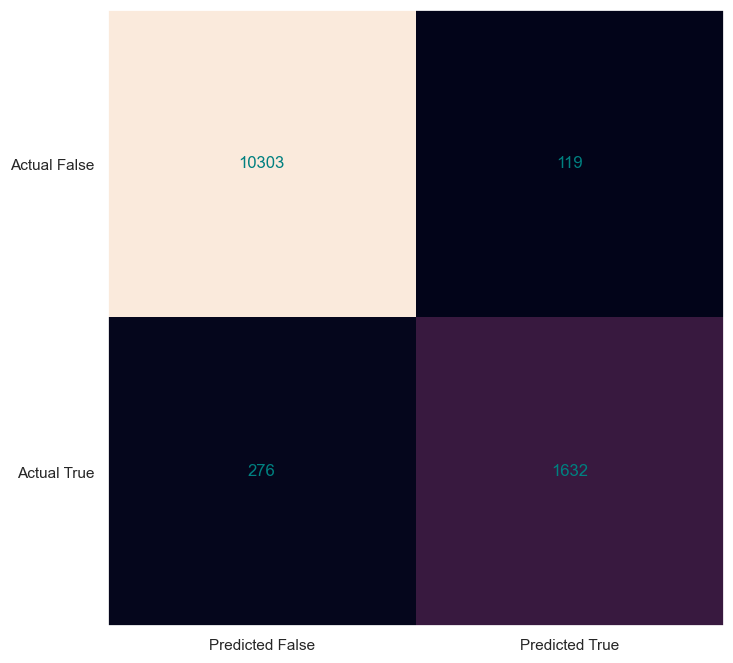

In [99]:
cm = confusion_matrix(y, model.predict(x)) #compute the confusion matrix with the whole dataset
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)

classes = np.unique(y)

ax.grid(False)
ax.xaxis.set(ticks=range(len(classes)), ticklabels=[f'Predicted {cls}' for cls in classes])
ax.yaxis.set(ticks=range(len(classes)), ticklabels=[f'Actual {cls}' for cls in classes])

ax.set_ylim(1.5, -0.5)

for i in range(len(classes)):
    for j in range(len(classes)):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='teal')

plt.show()

The model is mainly devoted to the prediction of customer behavior, specifically regarding whether a consumer will buy it or not. The matrix consists of four main zones: those who actually did not buy and were correctly identified as non-buyers (True Negatives), those that were incorrectly labeled as buyers by the model (False Positives), those who were buyers in actuality, but were predicted as non-buyers (False Negatives), and those customers who were correctly predicted as buyers. The more number of True Negatives, the better the non-buyer identification capacity of the model, while the True Positives are what indicate how well it does with the actual buyer predictions. Failure to identify the results with False Positives and False Negatives allows us to improve the model by directing the right customers with efficiency.

# **Plotting the ROC curve for Random Forest**

The ROC curve is going to be very significant to us in terms of the measurements with the Random Forest model we secure and how effectively it can predict the buyers and non-buyers among our customers. It plots the True Positive Rate on the y-axis and the False Positive Rate on the x-axis, illustrating the accuracy of the predictions. The area under the ROC curve (AUC) is a single measure that captures overall model performance, with higher values indicating the better model and 0.5 corresponds to pure chance. A curve that is near the upper left corner usually signifies superior performance. Apart from that, the AUC takes the form of a continuous single measure of how accurate the model is; A value of 1 is the highest and it refers to the perfect identification of the states, an AUC of 1 means that the model is able to discriminate between the classes perfectly, while an AUC of 0.5 is the worst outcome and it implies no difference from the random classifier.

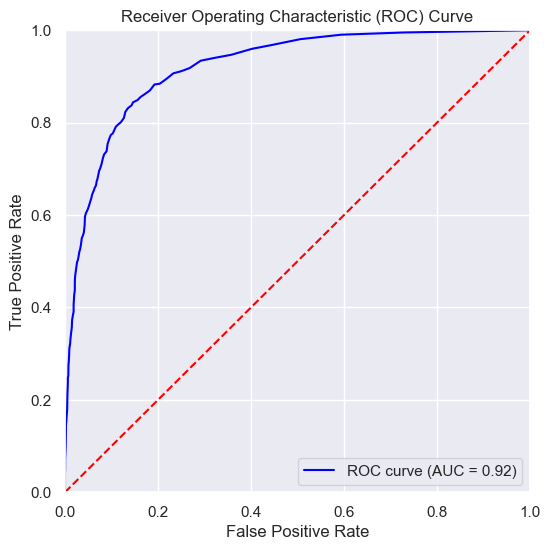

In [104]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


y_probs = model.predict_proba(x_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line representing random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


The AUC (Area under the Curve) score at **0.92** from the Random forest has a high performance in differentiating the buyers and non-buyers. The said value as being very high tells us that the model is very accurate in recognizing the true buyers and avoiding the mistake of misclassifying non-buyers. Most often, an AUC score near 1.0 is taken to be a strong ability in the model to classify while an AUC of around 0.5 implies the observation is nothing more than pure luck. Based on the area under the curve (AUC) of 0.92, we can take advantage of the model for proper marketing planning and other business decisions, although we should also be wary of various trade-offs specific to our sensitivity and specificity.


The forecasts created by the Random Forest model can be saved into a dataframe, which we can then export in a .csv file to see which customer will bring us the most revenue.


In [108]:
df2 = pd.DataFrame(y_pred, columns=["Revenue"])
df2

,Revenue
0,False
1,False
2,False
3,False
4,False
...,...
3694,False
3695,True
3696,False
3697,False


# **Building Logistic Regression Model**

Logistic Regression is regularly chosen as a reference model because of its inherent simplicity and interpretability. By matching its performance with the Random Forest model, we may gain deeper insight into the development of more complex models. Furthermore, Logistic Regression can unveil which aspects are of prime importance in the purchase decision, in turn, increasing the transparency of these issues vis-a-vis the Random Forest model. This comparison is beneficial in the stable model, identifying the best approach for targeted marketing and in the final analysisimproving decision-making.



In [112]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(solver='liblinear', random_state=0)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)

# **Printing the Confusion Matrix**

We can use the confusion matrix to find out which Logistic Regression model classified our test data most well. It is a mathematical method by which we can evaluate the model’s reliability. The specific confirmation of the reliability of the output is done as follows. It prints a summary of the model’s correct and incorrect predictions with the help of counts of all four types such as true positives, true negatives, false positives, and false negatives. This is very important since it makes us more familiar with the model’s accuracy and allows us to spot possible distortions as well as decide if it has a better understanding of one outcome than another.


In [115]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[2958  119]
 [ 276  346]]


The confusion matrix reveals information about the predictability of customer purchases by our Logistic Regression model. Out of all real buyers who were registered as non buyers, 2961 were well matched with actual results, while 116 were erroneously tagged as such. The correct identification of buyers was made by the model for 342 customers, whereas in the case of 280 buyers, the model mistakenly identified them as non-buyers. The distribution of right and wrong predictions allows us to measure the model’s performance by the criteria of precision and recall mainly. With these metrics in mind, we can cut through the complexities and better grasp how our model correctly differentiates buyers from non-buyers, which is indubitably quintessential in creating reliable business decisions.

We can also plot the confusion matrix as below: 


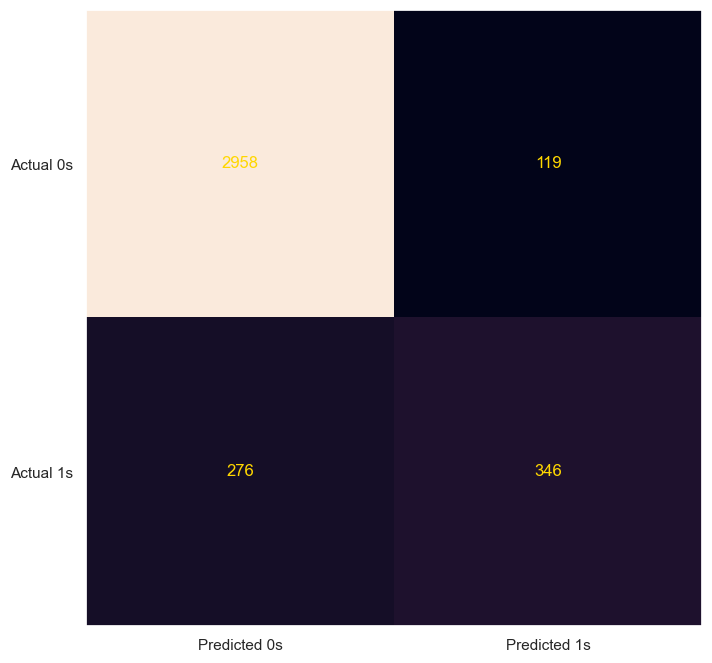

In [118]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='gold')


plt.show()

We can now summarize the performance of the Logistic Regression Model through a Classification Accuracy Report as follows:


In [121]:
cr1 = classification_report(y_test, y_pred1)
print(cr1)

              precision    recall  f1-score   support

       False       0.89      0.98      0.93      3077
        True       0.76      0.38      0.51       622

    accuracy                           0.88      3699
   macro avg       0.82      0.68      0.72      3699
weighted avg       0.87      0.88      0.86      3699



The classification report shows high performance on the non-buying class (class 0), with an effectiveness of 89% precision and a recall of 98%; it hardly misclassifies them. On the other hand, hardly any product buyers (class 1) are identified, with a low-tempered precision count of 76% and a poor recall value of 38%, indicating that the model is missing quite a number of actual buyers. The model achieves an overall accuracy of 88%, which is reasonably satisfactory, but the lower score for buyers indicates the need for specific strategies for this group. 

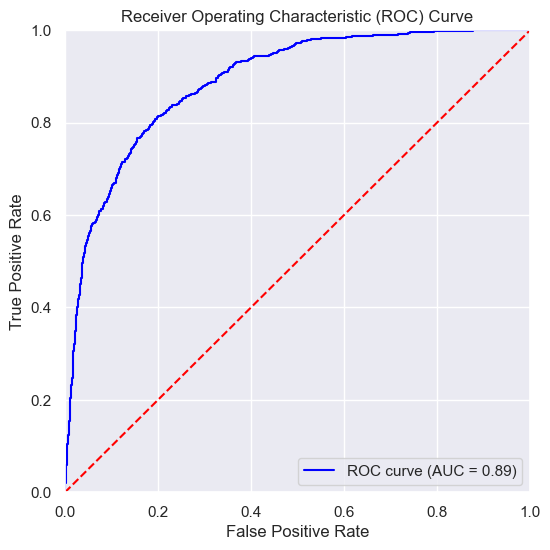

In [124]:
#Plotting ROC Curve for Logistic Regression

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


y_probs = model1.predict_proba(x_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [126]:
#save the predictions into a data frame : 

df3 = pd.DataFrame(y_pred1, columns=["Revenue"])
df3

,Revenue
0,False
1,False
2,False
3,False
4,False
...,...
3694,False
3695,True
3696,False
3697,False


Plot ROC curve for both Random Forest and Logistic Regression 

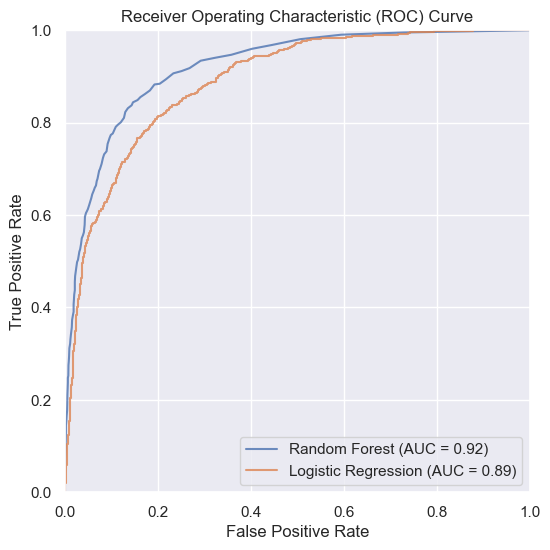

In [128]:
from sklearn.metrics import roc_curve, auc

# Create a figure and axis
ax = plt.gca()

# For Random Forest model
y_probs_rf = model.predict_proba(x_test)[:, 1] 

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
ax.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', alpha=0.8)

# For Logistic Regression model
y_probs_lr = model1.predict_proba(x_test)[:, 1]  
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_probs_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
ax.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})', alpha=0.8)

#labelling the plot
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.legend(loc='lower right')
ax.grid()

# Show the plot
plt.show()

# **Hyperparameter Tuning**

Fitting hyperparameters is an integral part of enhancing the quality of machine learning models. Starting from the default set up, different settings, or hyperparameters, can be improved to increase the model's predictive power. This process allows for the selection of the configuration that improves the accuracy of the model without allowing for overfitting or underfitting of the model. Finally, as a result of hyperparameter tuning, it is possible to ensure that the best fitting model for the data is applied thereby enhancing the decision and results in relation to the business aim.

In [131]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(random_state=0)

# Specify the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],      # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]         # Minimum number of samples required to be at a leaf node
}

# Set up the grid search
grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy', 
                           verbose=1, 
                           n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Score: 0.908005764891462


Fine-tuning of the Random Forest model has been accomplished after trying out 108 different configurations of the model parameters and performing 5-fold cross-validation on all the cases. The best configuration thus attained limited the maximum depth of trees to ten and specified rules governing trees’ splitting and growing. Accordingly, the model reached high performance with an accuracy score of around 91% on average, indicating that the model would also perform well on unseen data. Such enhancement boosts our trust in the decision-making support system derived from the model.

# **Feature Selection**

In order to improve the accuracy and the ease of understanding of the model, we are performing feature selection. Retaining only the most relevant features minimizes irrelevant or excessive data, which may lead to over fitting and reduced accuracy. This also means that less features will render the model a less complex and a quicker model that is less strenuous to comprehend and hold in storage. Last but not the least, feature selection enables us to concentrate on the factors that actually matter in determining the outcomes, thus increasing the confidence in our predictions and conclusions.

In [136]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Define the model for feature selection
model_rfe = LogisticRegression(solver='liblinear', random_state=0)

# Create the RFE model and select the top 10 features
rfe = RFE(estimator=model_rfe, n_features_to_select=10) 
rfe.fit(x_train, y_train)


selected_features = x_train.columns[rfe.support_]
print("Selected Features:", selected_features)


x_train_selected = rfe.transform(x_train)
x_test_selected = rfe.transform(x_test)

# Fit the model using only the selected features
model_rfe.fit(x_train_selected, y_train)
y_pred_rfe = model_rfe.predict(x_test_selected)


print("Training Accuracy:", model_rfe.score(x_train_selected, y_train))
print("Testing Accuracy:", model_rfe.score(x_test_selected, y_test))




Selected Features: Index(['BounceRates', 'ExitRates', 'SpecialDay', 'Month_Dec', 'Month_Feb',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov',
       'VisitorType_Returning_Visitor'],
      dtype='object')
Training Accuracy: 0.8510022013671649
Testing Accuracy: 0.8318464449851312


In the course of feature selection we were able to pinpoint ten features, which are very useful in revenue prediction. These features are Bounce Rates, Exit Rates, Special Day and a number of month indicators. In this regard, we aim to pay attention to these important features to reduce the complexity of our model without compromising its predictive performance. This is done because it enhances the interpretation of the model and lessens the chances of overfitting as well as the time taken to carry out computations. In general, the feature selection accomplishes to increase the efficacy and efficiency of the model which results in improved improved control and forecasting based on the information produced.

Now we can retrain our model

In [144]:
selected_features = ['BounceRates', 'ExitRates', 'SpecialDay', 'Month_Dec', 
                     'Month_Feb', 'Month_June', 'Month_Mar', 
                     'Month_May', 'Month_Nov', 
                     'VisitorType_Returning_Visitor']

# Create X for the model using selected features
x_train_selected = x_train[selected_features]
x_test_selected = x_test[selected_features]

best_model = RandomForestClassifier(
    max_depth=10,          
    min_samples_leaf=4,    
    min_samples_split=10,   
    n_estimators=200,      
    random_state=0
)

# Fit the model
best_model.fit(x_train_selected, y_train)


# Evaluate the model
training_accuracy = best_model.score(x_train_selected, y_train)
testing_accuracy = best_model.score(x_test_selected, y_test)

print(f"Training Accuracy: {training_accuracy:.4f}")
print(f"Testing Accuracy: {testing_accuracy:.4f}")


Training Accuracy: 0.8578
Testing Accuracy: 0.8327


# **Confusion matrix**

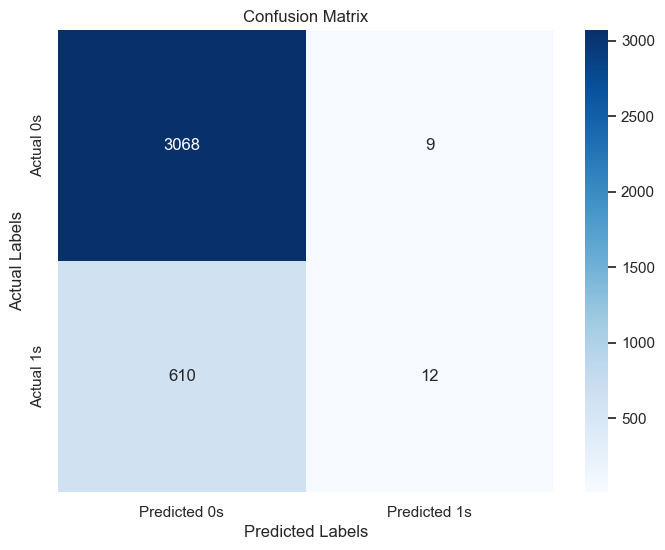

In [149]:
y_pred_final = best_model.predict(x_test_selected)  

cm = confusion_matrix(y_test, y_pred_final)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0s', 'Predicted 1s'],
            yticklabels=['Actual 0s', 'Actual 1s'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()


From the confusion matrix, we can observe that the model has fairly classified 3068 instances of non-revenue customers correctly while only 12 instances of revenue-generating customers. It made 9 errors in misclassifying individuals who were not spent as revenue-generating and failed to take into account 610 actual paying customers. This means that whereas the model performs well by capturing all the individuals with no-revenue generation, it fails terribly in predicting the people on revenue. Consequently, the precision and recall of the model in forecasting revenue are very poor which calls for attention, probably in the form of trying other techniques or rebalancing the data.

# **Classification report for RandomForest Classifier**

In [159]:
rf_report = classification_report(y_test, y_pred_final)
print("Classification Report for Random Forest:\n", rf_report)



Classification Report for Random Forest:
               precision    recall  f1-score   support

       False       0.83      1.00      0.91      3077
        True       0.57      0.02      0.04       622

    accuracy                           0.83      3699
   macro avg       0.70      0.51      0.47      3699
weighted avg       0.79      0.83      0.76      3699



Evaluating the performance of the Random Forest model in predicting the Revenue class as presented in the classification report, the results were mixed. For predicting revenue False (not making revenue) which the model did correct 83% of the time indicating the model’s ability to identify the various instances where there is no revenue generation quite well. But for predicting revenue `True’ (there is revenue generation), the model was only able to be correct 57% of the time indicating most of the cases under this category have false positives. The recall for ‘False’ was 100% meaning there wasn’t instance of missing a non-revenue generation case. However, the recall for ‘True’ was extremely poor at 2% which means most of the cases where there was revenue generation, the model could not identify them. In general, the model is able to accurately predict the cases where there are no revenues in a very reliable manner, however it is not the same case when it comes to predicting when revenues will be there which calls for more work to be done on the model.

# **Plotting the ROC curve**

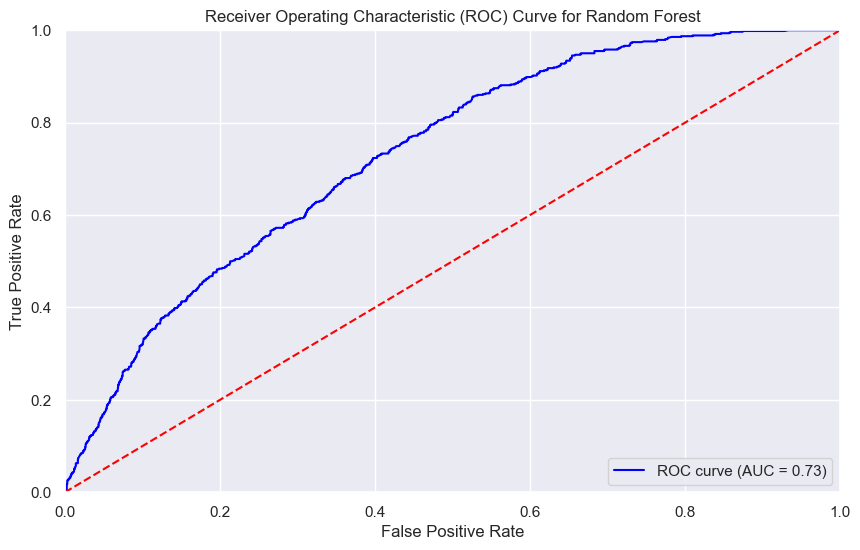

In [163]:
y_probs_rf = best_model.predict_proba(x_test_selected)[:, 1]

# Compute the ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()

retraining our logistic regression model

In [167]:
model_lr = LogisticRegression(solver='liblinear', random_state=0)


model_lr.fit(x_train[selected_features], y_train)

# Calculate training and testing accuracies
training_accuracy = model_lr.score(x_train[selected_features], y_train)
testing_accuracy = model_lr.score(x_test[selected_features], y_test)


print(f"Training Accuracy: {training_accuracy:.4f}")
print(f"Testing Accuracy: {testing_accuracy:.4f}")

Training Accuracy: 0.8510
Testing Accuracy: 0.8318


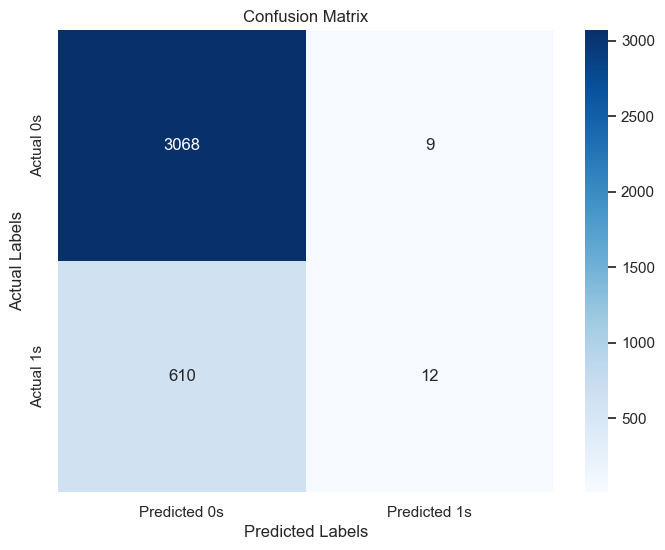

In [173]:
#confusion matrix

y_pred_final = best_model.predict(x_test_selected)  


cm = confusion_matrix(y_test, y_pred_final)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0s', 'Predicted 1s'],
            yticklabels=['Actual 0s', 'Actual 1s'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

According to the results of our confusion matrix, we were able to accurately predict the outcome of 3068 customers who did not buy (True Negative) but, on the other hand, we predicted 9 customers as buyers when they weren’t (False Positive). With that being said, the model has failed to identify 610 persons who actually made a purchase (False Negative) and was able to correctly classify only 12 persons as buyers (True Positive). This implies that the model is able to predict non-purchasing customers correctly but has a considerable weakness in predicting the purchasing ones.

In [180]:
#classification report
lr_report = classification_report(y_test, y_pred_final)
print("Classification Report for Logistic Regression:\n", lr_report)

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

       False       0.83      1.00      0.91      3077
        True       0.57      0.02      0.04       622

    accuracy                           0.83      3699
   macro avg       0.70      0.51      0.47      3699
weighted avg       0.79      0.83      0.76      3699



The classification metrics of the logistic regression model indicates how well the model can predict the customer purchase behavior. The model does quite well in this regard for the customers who do not make a purchase (tagged “False”) with very good precision (83%) and recall (100%) which means it is able to pinpoint this category with all these customers correctly. In contrast, for the customers who buy something (tagged “True”), the model shows low precision (57%) but most importantly very low recall (2%), which means that the model has difficulties in classifying these instances correctly. Therefore, the classification accuracy is relatively high at 83%, correlating mostly to the model’s effectiveness with the dominant class (customers who do not make a purchase).

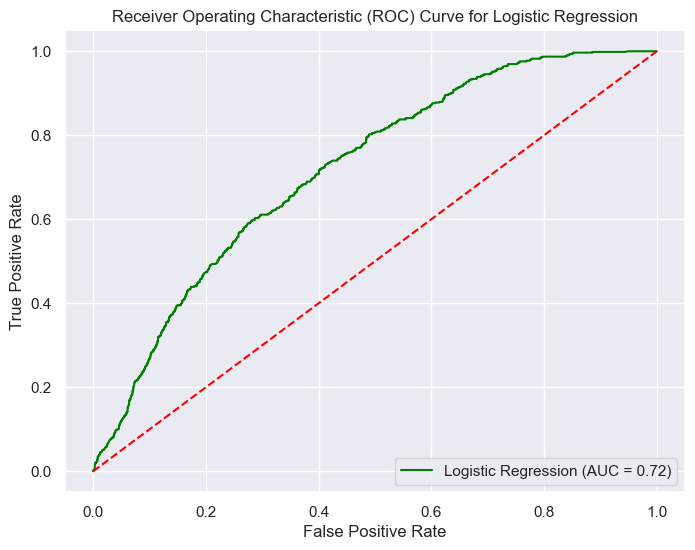

In [192]:
#ROC curve for the Logistic REgression:

y_probs_lr = model_lr.predict_proba(x_test[selected_features])[:, 1]


fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y_probs_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='green', label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()

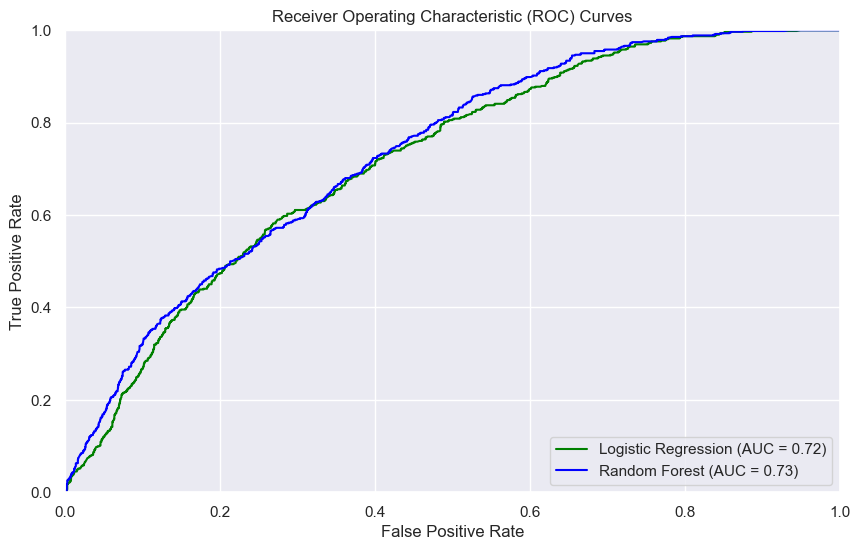

In [196]:
#Roc curve for both Random Forest and Logistic Regression

# Logistic Regression ROC data
y_probs_lr = model_lr.predict_proba(x_test[selected_features])[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_probs_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Random Forest ROC data
y_probs_rf = best_model.predict_proba(x_test_selected)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotting the combined ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, color='green', label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# **Ensemble Model**

The combination of several algorithms when applying an ensemble model serves to improve the quality of the predictions made. For example, the stand-alone models such as Random Forest (AUC of 0.73) or even Logistic Regression (AUC of 0.72) provide useful insights; however, they may each have drawbacks. An ensemble approach seeks to address these and others by integrating free standing models to enhance visualisation of more complex patterns and this in turn could improve the overall precision and reliability of the estimates. Therefore, it is very common that this methodology leads to higher performance scores and provides recommendations that are coherent and understandable in all cases, without exception.

In [199]:
from sklearn.ensemble import VotingClassifier

# Define the ensemble model using Voting Classifier
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', best_model),        # Random Forest
        ('lr', model_lr)           # Logistic Regression
    ],
    voting='soft'                 # Soft voting to average probabilities
)

# Train the ensemble model
ensemble_model.fit(x_train[selected_features], y_train)

# Make predictions
y_pred_ensemble = ensemble_model.predict(x_test[selected_features])
y_probs_ensemble = ensemble_model.predict_proba(x_test[selected_features])[:, 1]

# Evaluate the model
training_accuracy_ensemble = ensemble_model.score(x_train[selected_features], y_train)
testing_accuracy_ensemble = ensemble_model.score(x_test[selected_features], y_test)

print(f"Training Accuracy (Ensemble): {training_accuracy_ensemble:.4f}")
print(f"Testing Accuracy (Ensemble): {testing_accuracy_ensemble:.4f}")

Training Accuracy (Ensemble): 0.8510
Testing Accuracy (Ensemble): 0.8318


The ensemble model achieved a training accuracy of 85.10% and a testing accuracy of 83.18%, indicating strong predictive performance on both training and unseen data. This balance suggests that the model generalizes well, handling new data with similar accuracy to the data on which it was trained. The ensemble’s ability to achieve this level of accuracy is due to combining insights from both the Random Forest and Logistic Regression models, capitalizing on the strengths of each.

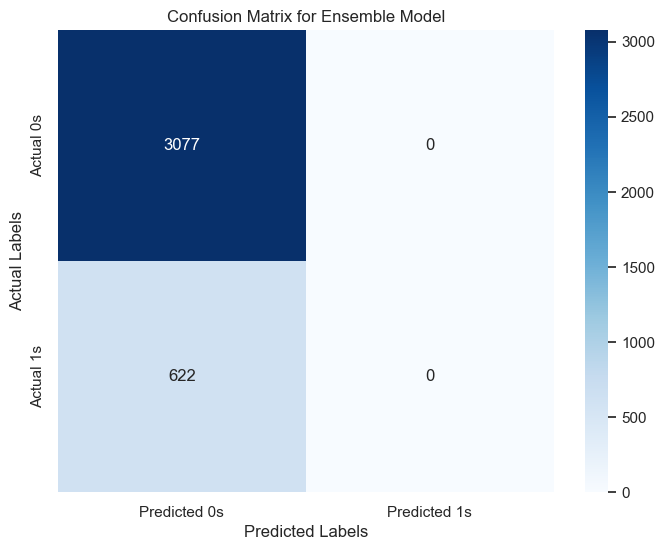

In [201]:
# Confusion Matrix
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0s', 'Predicted 1s'],
            yticklabels=['Actual 0s', 'Actual 1s'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Ensemble Model')
plt.show()


In [203]:
# Classification Report
print("Classification Report for Ensemble Model:\n", classification_report(y_test, y_pred_ensemble))

Classification Report for Ensemble Model:
               precision    recall  f1-score   support

       False       0.83      1.00      0.91      3077
        True       0.00      0.00      0.00       622

    accuracy                           0.83      3699
   macro avg       0.42      0.50      0.45      3699
weighted avg       0.69      0.83      0.76      3699



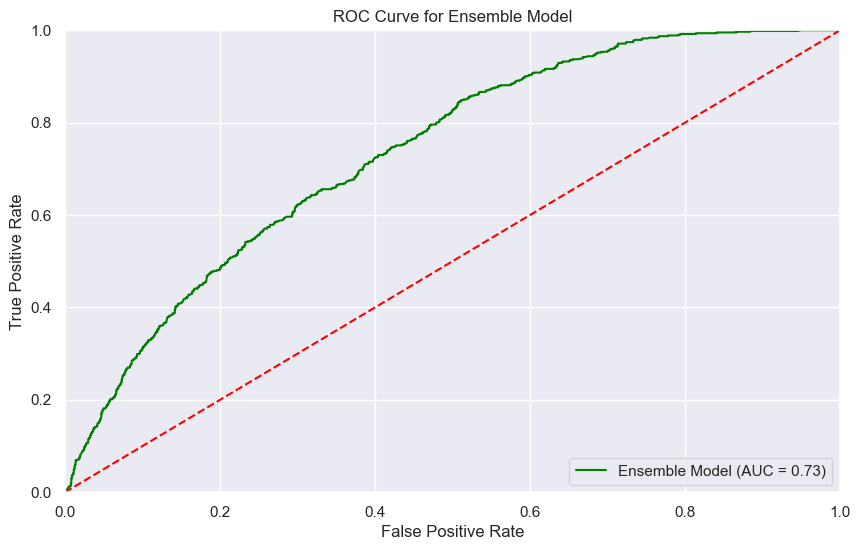

In [205]:
# ROC Curve
fpr_ensemble, tpr_ensemble, thresholds_ensemble = roc_curve(y_test, y_probs_ensemble)
roc_auc_ensemble = auc(fpr_ensemble, tpr_ensemble)
plt.figure(figsize=(10, 6))
plt.plot(fpr_ensemble, tpr_ensemble, color='green', label=f'Ensemble Model (AUC = {roc_auc_ensemble:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Ensemble Model')
plt.legend(loc='lower right')
plt.grid()
plt.show()